# NATIONAL WORKSHOP ON 'DEEP LEARNING AND ACCELERATED COMPUTING' (NWDLAC 2019)
# Sep 26 -27, 2019 

**Resource Persons : Dr. M.G.Sumithra, NVIDIA Certified DLI-Instructor
➢ Mr. V.Chandran, NVIDIA Certified DLI-Instructor
➢ Ms. M.Suriya, NVIDIA Certified DLI-Instructor **
                

**Prinicipal Coordinating Academies : SRM Institute of Science and Technology**
** In association With: NVIDIA DEEP Learning Institute

# Malaria Parasite Detection
** In this tutorial, we provide you a brief introduction to malaria parasite detection using Convolution Neural Networks(CNNs). You will be able to build a CNN model that can be used for classification.**


Convolution Neural Networks are mainly use for large size input data such as Image data. 
* Convolution Neural Networks (CNNs) use parameter sharing.
* Small pattern detectors called filters are used to convolve over the entire image.
* These filters are learned through NN training in the same way as in fully connected networks.
* Just like a hidden layer in a fully connected layer, convolution layers are used in CNNs.
* To handle large size of image data, pooling layers are introduced.
* Normalization layers were used in early CNN architectures, but due to their minimal impact, they are not much used in the present CNNs.


** Today we are going to see a simple 3 convolution layers convolution neural network. We are going to use PlantVillage leaf 
dataset. It contains 38 classes dataset. From which we are just going to use 4 classes of Apple. The objective of the work is to Diseases classification in Apple leaves.**

Dataset Link : :https://github.com/spMohanty/PlantVillage-Dataset/tree/master/raw/color
We split the dataset into training validation and testing sample

### A. Data Preprocessing

** A1. Import required Libraries **
* From keras library we are going to use image preprocessing task, to normalize the image pixel values in between 0 to 1.
* Model is imported to load variuos Neural NEtwrok models such as Sequential.
* We are going to use Stochastic Gradient Descent(SGD) as a optimizer 
* Keras layers such as Dense, Flatten, Conv2D and MaxPooling is used to implement the CNN model 

In [1]:
import numpy as np
import keras
from keras import models
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import SGD
from keras import layers
from keras.layers import  Dense, Flatten, Conv2D, MaxPooling2D
from keras import Input
                                                                                                            


Using TensorFlow backend.


** A2. Loading the training and testing data and defining the basic parameters **
* We are resizing the input image to 64 * 64

* In the dataset :
    Training Set : 70% 
    Validation Set : 20%
    Test Set : 10%

In [10]:
# Normalize training and validation data in the range of 0 to 1
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Read the training sample and set the batch size 
train_generator = train_datagen.flow_from_directory(
        'cellimage/train/',
        target_size=(64, 64),
        batch_size=16,
        class_mode='categorical')

# Read Validation data from directory and define target size with batch size
validation_generator = validation_datagen.flow_from_directory(
        'cellimage/val/',
        target_size=(64, 64),
        batch_size=16,
        class_mode='categorical',
        shuffle=False)

test_generator = test_datagen.flow_from_directory(
        'cellimage/test/',
        target_size=(64, 64),
        batch_size=1,
        class_mode='categorical',
        shuffle=False)


Found 29420 images belonging to 2 classes.
Found 3528 images belonging to 2 classes.
Found 14986 images belonging to 2 classes.


### B. Model Building


* We are going to use 2 convolution layers with 3*3 filer and relu as an activation function
* Then max pooling layer with 2*2 filter is used
* After that we are going to use Flatten layer
* Then Dense layer is used with relu function
* In the output layer softmax function is used with 4 neurons as we have four class dataset.
* model.summary() is used to check the overall architecture of the model with number of learnable parameters in each 

#### B1. Model Definition

In [13]:
# Create the model
model = models.Sequential()
# Add new layers
model.add(Conv2D(128, kernel_size=(3,3), activation = 'relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 128)       3584      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        73792     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)              0         
__________

### B2. Compile the model with SGD(Stochastic Gradient Descent) and train it with 10 epochs.

In [14]:
sgd = SGD(lr=0.01,decay=1e-6, momentum=0.9, nesterov=True)
# We are going to use accuracy metrics and cross entropy loss as performance parameters
model.compile(sgd, loss='categorical_crossentropy', metrics=['acc'])
# Train the model 
history = model.fit_generator(train_generator, 
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=2,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/2
1839/1838 [==============================] - 668s 363ms/step - loss: 0.3237 - acc: 0.8436 - val_loss: 0.2162 - val_acc: 0.9348
Epoch 2/2
1839/1838 [==============================] - 589s 320ms/step - loss: 0.1334 - acc: 0.9580 - val_loss: 0.1928 - val_acc: 0.9371


### B3. Saving the model


In [15]:
model.save('cnn_classification.h5')

### B4. Loading the Model

In [16]:
model = models.load_model('cnn_classification.h5')
print(model)

### B5. Saving weignts of model

In [18]:
model.save_weights('cnn_classification.h5')

### B6. Loading the Model weights

In [19]:
model.load_weights('cnn_classification.h5')

### C. Performance Measures

**Now we are going to plot the accuracy and loss **

In [20]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
print(train_acc)
print(val_acc)
print(train_loss)
print(val_loss)

[0.8435757987682386, 0.9579537729435758]
[0.9348072562358276, 0.9370748299319728]
[0.3237130894664394, 0.1333807492283009]
[0.21620921408362917, 0.19283403323165008]


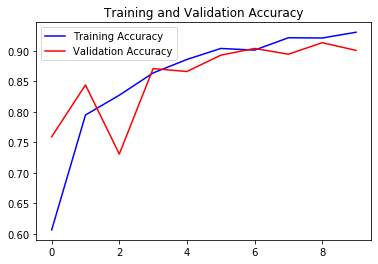

<Figure size 432x288 with 0 Axes>

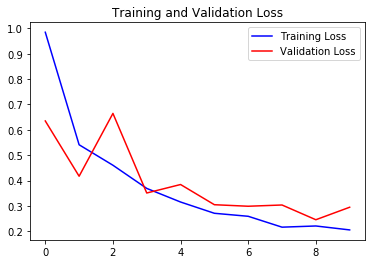

In [10]:
epochs = range(len(train_acc)) 
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


# Model Testing

In [21]:
# Get the filenames from the generator
fnames = test_generator.filenames
 
# Get the ground truth from generator
ground_truth = test_generator.classes
 
# Get the label to class mapping from the generator
label2index = test_generator.class_indices
 
# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())
 
# Get the predictions from the model using the generator
predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)

 
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))


14986/14986 [==============================] - 216s 14ms/step
No of errors = 557/14986


# Assignemnt
**You have to load the weights of previous model and with the help of previous weights try to create a CNN model with one more convolution layers. You have to train only after the newly added convolution layers of the neural network. **

Hint : Use model.load_weights('weights.h5', by_name=True)


In [47]:
new_model= models.Sequential()
model.load_weights('cnn_classification.h5', by_name=True)
new_model.add(Conv2D(128, kernel_size=(3,3), activation = 'relu', input_shape=(64,64,3)))
new_model.add(MaxPooling2D(pool_size=(2,2)))
new_model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
new_model.add(MaxPooling2D(pool_size=(2,2)))
new_model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
new_model.add(MaxPooling2D(pool_size=(2,2)))
new_model.add(Conv2D(32, kernel_size=(3,3), activation = 'relu'))
new_model.add(Conv2D(32, kernel_size=(3,3), activation = 'relu'))
new_model.add(layers.Flatten())
new_model.add(layers.Dense(32, activation='relu'))
new_model.add(layers.Dense(2, activation='softmax'))
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 62, 62, 128)       3584      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 31, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 29, 29, 64)        73792     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 4, 4, 32)          18464     
__________

### Training the model after 5rd layer


In [48]:
for layer in new_model.layers[:6]:
    layer.trainable = False

for layer in new_model.layers:
    print(layer, layer.trainable)
new_model.summary()

<keras.layers.convolutional.Conv2D object at 0x000000CF9A034EF0> False
<keras.layers.pooling.MaxPooling2D object at 0x000000CF9A034E80> False
<keras.layers.convolutional.Conv2D object at 0x000000CF9A035A90> False
<keras.layers.pooling.MaxPooling2D object at 0x000000CF9A03B320> False
<keras.layers.convolutional.Conv2D object at 0x000000CF9A0358D0> False
<keras.layers.pooling.MaxPooling2D object at 0x000000CF9A064DA0> False
<keras.layers.convolutional.Conv2D object at 0x000000CF9A084048> True
<keras.layers.convolutional.Conv2D object at 0x000000CF9A09DB00> True
<keras.layers.core.Flatten object at 0x000000CF9A0B4E10> True
<keras.layers.core.Dense object at 0x000000CF9C15AAC8> True
<keras.layers.core.Dense object at 0x000000CF9C175DD8> True
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 62, 62, 128)       3584      
______________________________________________________

In [ ]:
# Here we are changing the learning rate from 0.001 to 0.01

In [49]:
sgd = SGD(lr=0.01,decay=1e-6, momentum=0.9, nesterov=True)
# We are going to use accuracy metrics and cross entropy loss as performance parameters
new_model.compile(sgd, loss='categorical_crossentropy', metrics=['acc'])
# Train the model 
new_history = new_model.fit_generator(train_generator, 
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=2,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/2
1839/1838 [==============================] - 724s 394ms/step - loss: 0.6630 - acc: 0.5911 - val_loss: 0.7001 - val_acc: 0.5947
Epoch 2/2
1839/1838 [==============================] - 508s 276ms/step - loss: 0.5940 - acc: 0.6870 - val_loss: 0.7521 - val_acc: 0.5471


### C. Performance Measures

**Now we are going to plot the accuracy and loss **

In [50]:
train_acc = new_history.history['acc']
val_acc = new_history.history['val_acc']
train_loss = new_history.history['loss']
val_loss = new_history.history['val_loss']

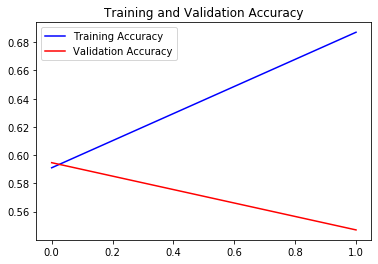

<Figure size 432x288 with 0 Axes>

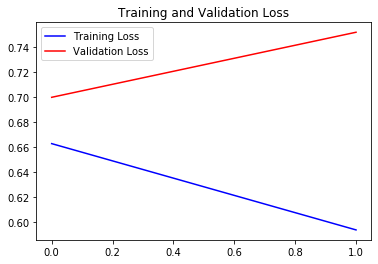

In [51]:
epochs = range(len(train_acc)) 
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


# Model Testing

In [52]:
# Get the filenames from the generator
fnames = test_generator.filenames
 
# Get the ground truth from generator
ground_truth = test_generator.classes
 
# Get the label to class mapping from the generator
label2index = test_generator.class_indices
 
# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())
 
# Get the predictions from the model using the generator
predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)
 
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))


14986/14986 [==============================] - 186s 12ms/step
No of errors = 557/14986
